In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
row_data = pd.read_csv('./bs_station_a.csv')

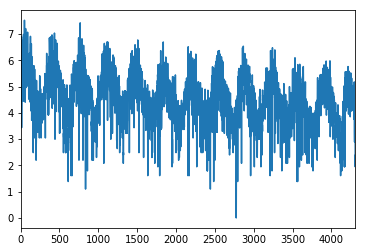

In [4]:
row_data.bs.plot()

In [5]:
row_data.head()

,Unnamed: 0,Unnamed: 0.1,bs,id,day,year,yday,wday,Tmin0,Tmean1,Tmean2,Tmax0,rainfall,x,y,h,type,AR_start,type1,month
0,0,1,5.669881,1,29,1961,304,2,6.5,6.5,7.0,14.0,97,451.3,534.6,5,missing,False,M,10
1,1,2,5.594711,1,30,1961,305,3,7.0,10.5,6.5,14.0,23,451.3,534.6,5,missing,False,M,10
2,2,3,5.739793,1,31,1961,306,4,7.5,10.5,10.5,12.0,23,451.3,534.6,5,missing,False,M,11
3,3,4,4.983607,1,32,1961,307,5,3.5,10.0,10.5,7.0,23,451.3,534.6,5,missing,False,M,11
4,4,5,4.941642,1,33,1961,308,6,1.5,5.0,10.0,7.5,23,451.3,534.6,5,missing,False,M,11


In [6]:
row_data.describe()

,Unnamed: 0,Unnamed: 0.1,bs,id,day,year,yday,wday,Tmin0,Tmean1,Tmean2,Tmax0,rainfall,x,y,h,month
count,4309.000000,4309.000000,4309.000000,4309.0,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4.309000e+03,4.309000e+03,4309.0,4309.000000
mean,2154.000000,2155.000000,4.511542,1.0,2258.624043,1967.441170,181.357392,3.988164,6.024252,8.935832,8.930842,11.852982,50.570434,4.513000e+02,5.346000e+02,5.0,6.467394
std,1244.045484,1244.045484,0.964446,0.0,1302.149900,3.584901,107.009807,1.999210,4.684107,4.834518,4.831405,5.341096,27.667460,3.177916e-11,4.320601e-11,0.0,3.499060
min,0.000000,1.000000,0.000000,1.0,29.000000,1961.000000,1.000000,1.000000,-10.000000,-4.000000,-4.000000,-2.500000,4.000000,4.513000e+02,5.346000e+02,5.0,1.000000
25%,1077.000000,1078.000000,3.912023,1.0,1135.000000,1964.000000,87.000000,2.000000,2.500000,5.000000,5.000000,7.500000,32.000000,4.513000e+02,5.346000e+02,5.0,3.000000
50%,2154.000000,2155.000000,4.553877,1.0,2226.000000,1967.000000,180.000000,4.000000,6.000000,9.000000,9.000000,12.000000,47.000000,4.513000e+02,5.346000e+02,5.0,6.000000
75%,3231.000000,3232.000000,5.164786,1.0,3371.000000,1970.000000,274.000000,6.000000,10.000000,13.000000,13.000000,16.000000,68.000000,4.513000e+02,5.346000e+02,5.0,10.000000
max,4308.000000,4309.000000,7.524561,1.0,4582.000000,1974.000000,366.000000,7.000000,17.000000,22.000000,22.000000,28.500000,145.000000,4.513000e+02,5.346000e+02,5.0,12.000000


1961 to 2005

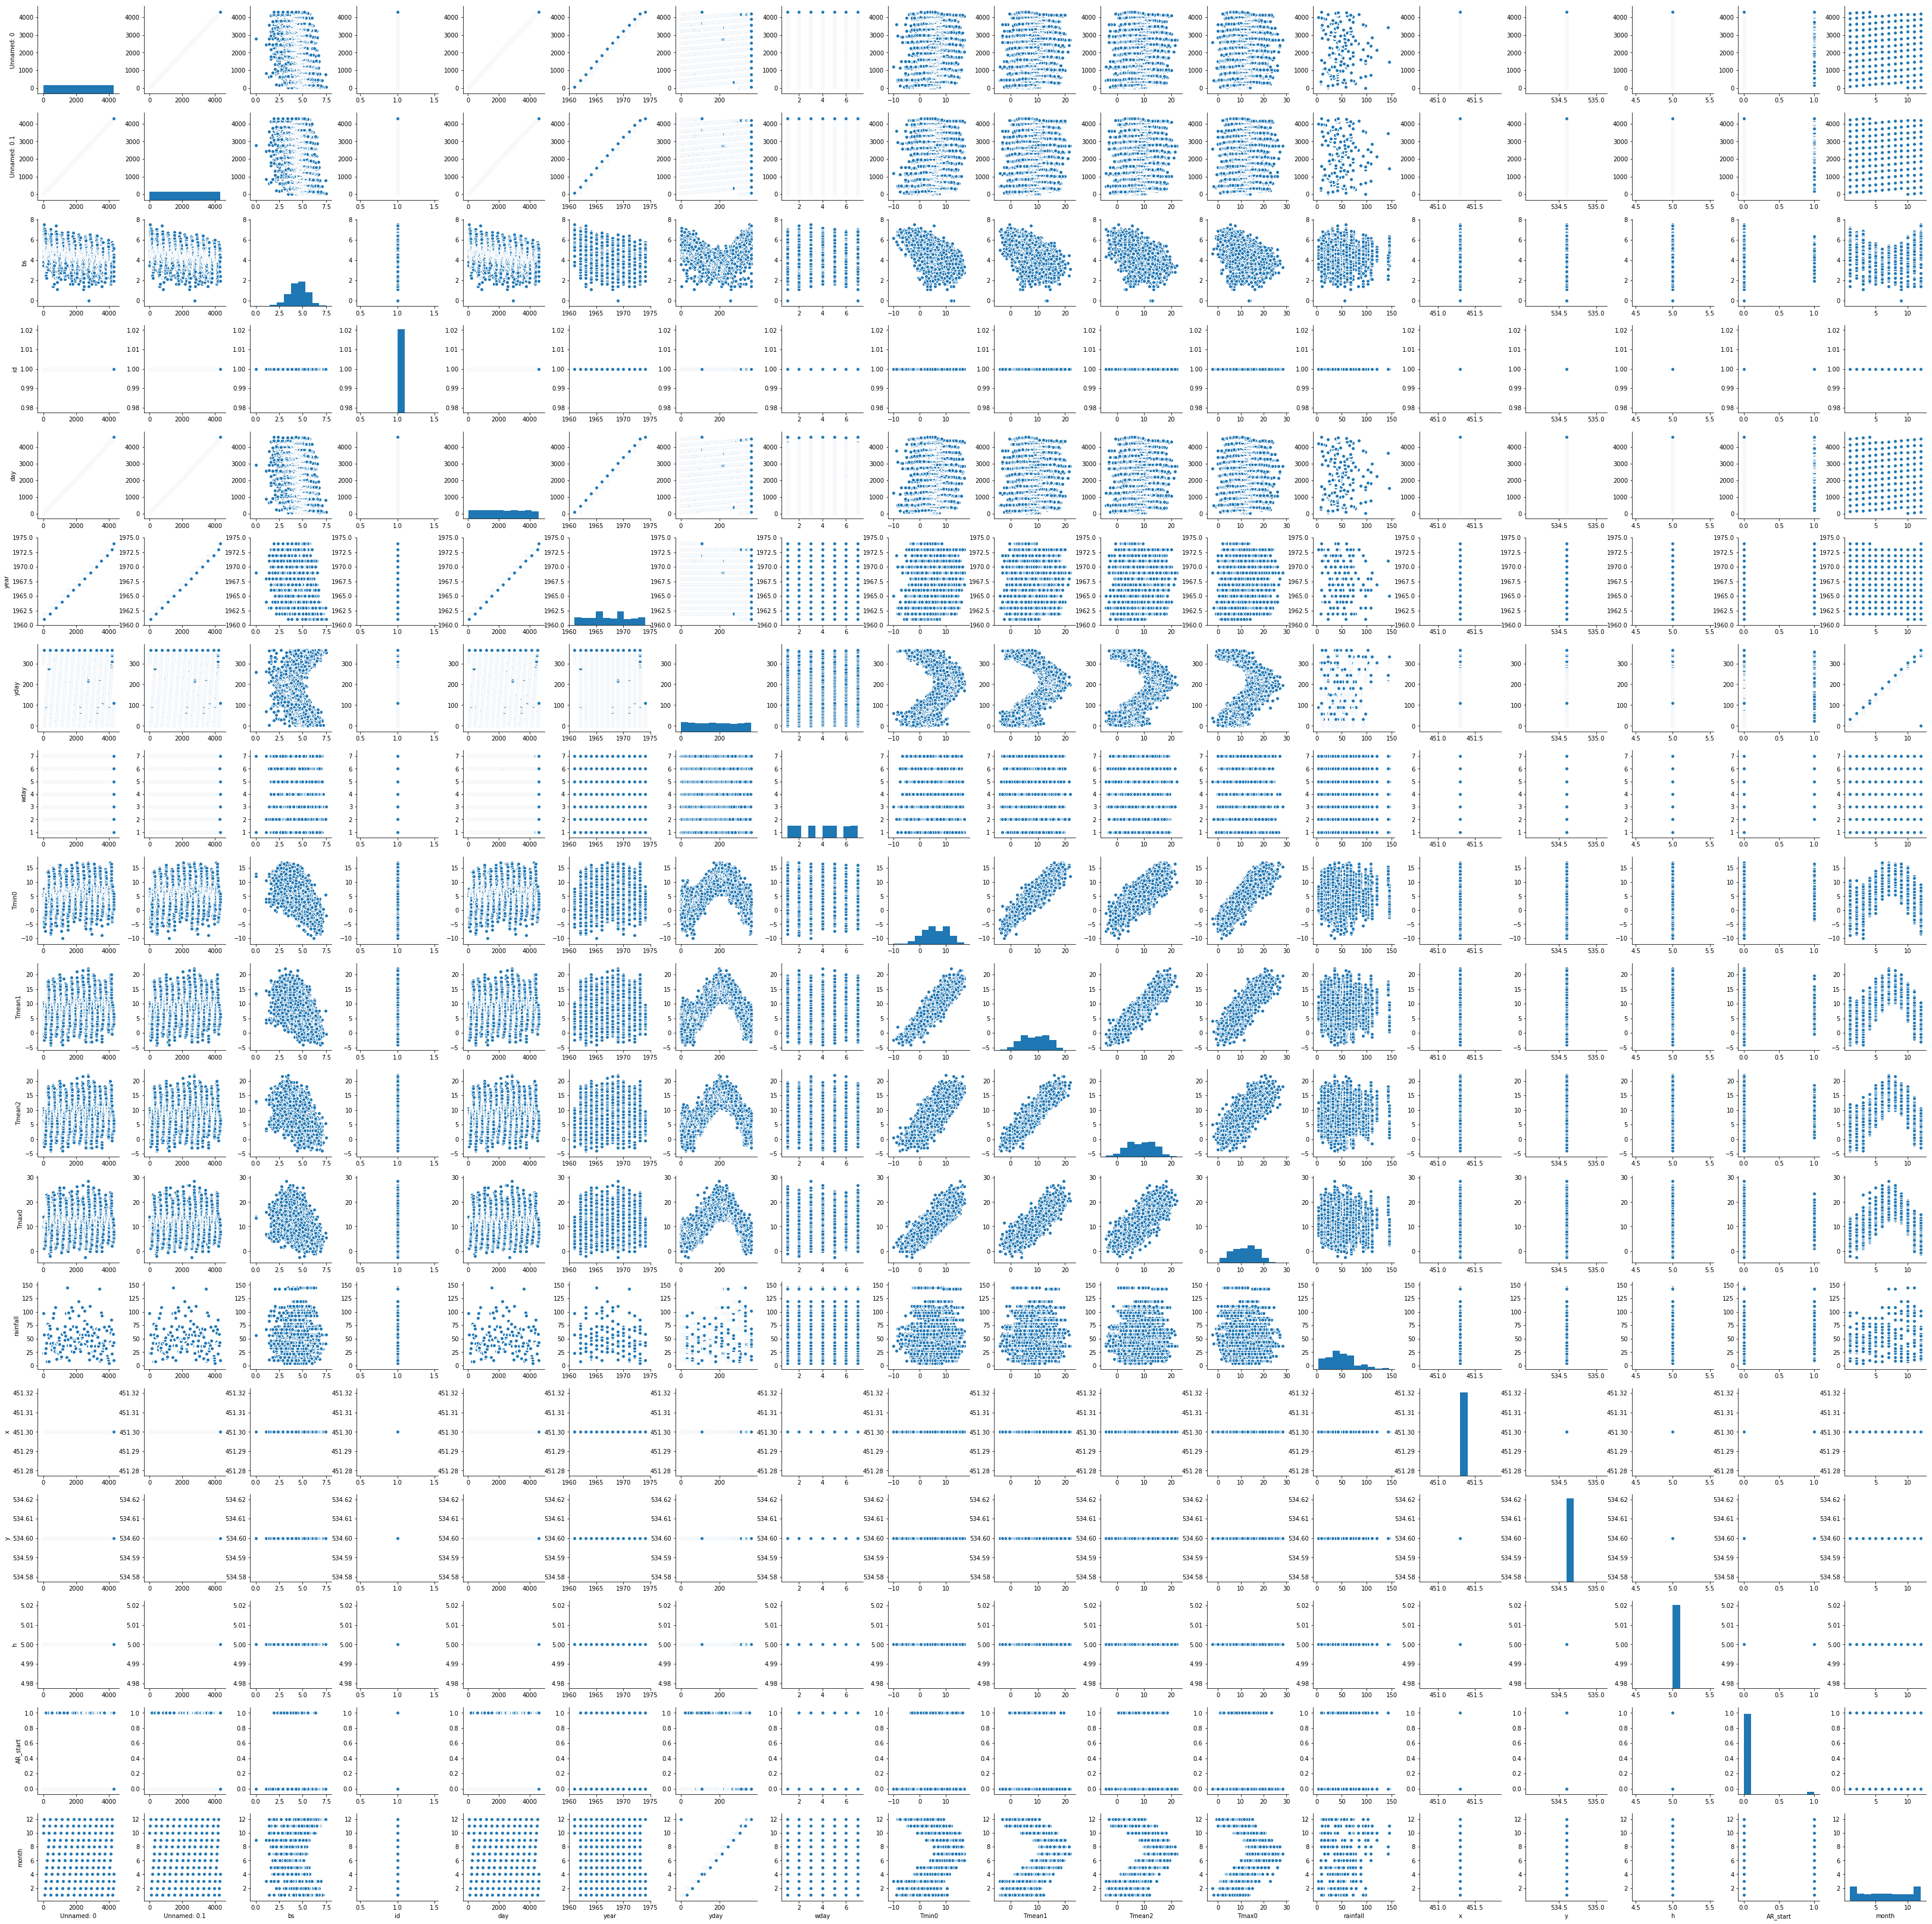

In [15]:
sns.pairplot(row_data)

In [7]:
from sklearn import linear_model

In [8]:
sklearn.linear_model

NameError: name 'sklearn' is not defined

In [9]:
clf = linear_model.LinearRegression()
# 'id', 'day', 'year', 'yday', 'wday', 'Tmin0', 'Tmean1', 'Tmean2', 'Tmax0', 'rainfall', 'x', 'y', 'h', 'AR_start', 'month'
X = row_data[['Tmin0', 'rainfall']].as_matrix()
Y = row_data.bs.as_matrix()

clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('coef: {}'.format(clf.coef_))
print('intercept: {}'.format(clf.intercept_))
print('R: {}'.format(clf.score(X, Y)))

coef: [-0.1115493 -0.0013201]
intercept: 5.250301070654421
R: 0.2978663966121775


In [14]:
clf.rank_

2

In [15]:
clf.singular_

array([ 1816.0989639 ,   306.64253185])

In [11]:
import numpy as np

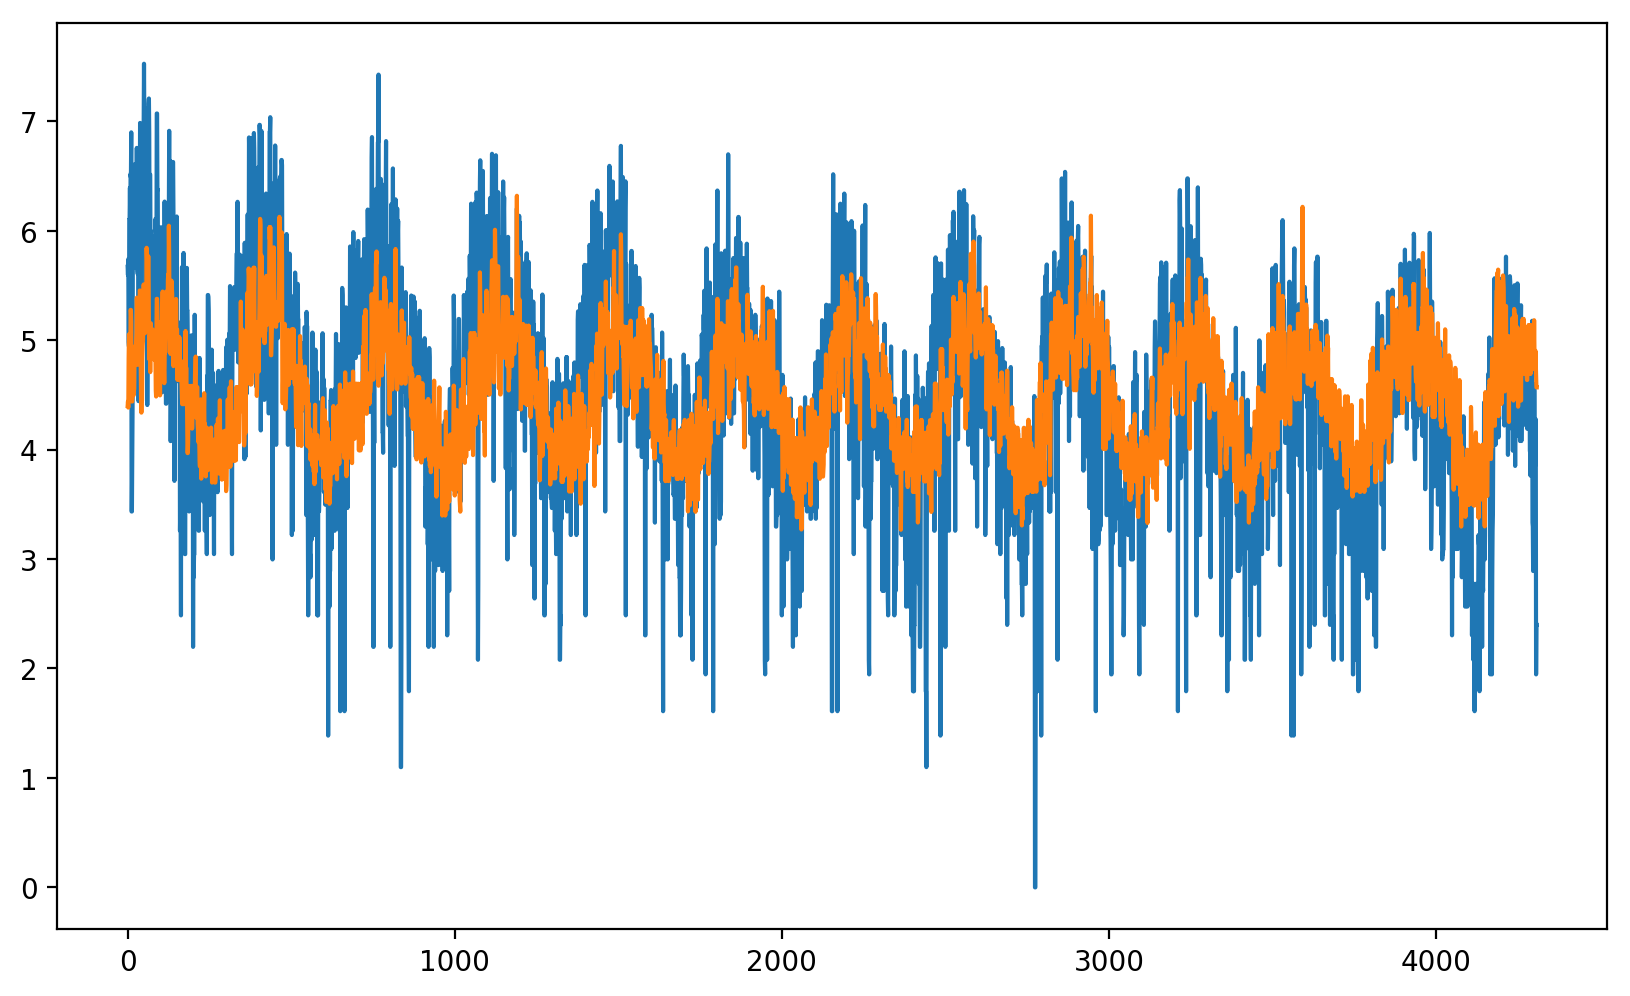

In [22]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(Y)
plt.plot(clf.predict(X))
plt.show()

In [46]:
data = pd.DataFrame(data=row_data[['bs', 'yday', '']])

6

In [13]:
import statsmodels.api as sm

/home/admin/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
x = sm.add_constant(X)
results = sm.OLS(endog=Y, exog=x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     913.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):               0.00
Time:                        01:25:34   Log-Likelihood:                -5195.8
No. Observations:                4309   AIC:                         1.040e+04
Df Residuals:                    4306   BIC:                         1.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2503      0.029    178.814      0.000       5.193       5.308
x1            -0.1115      0.003    -42.320      0.000      -0.117      -0.106
x2            -0.0013      0.000     -2.958      0.003      -0.002      -0.000
==============================================================================
Omnibus:                      368.828   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.550
Skew:                          -0.651   Prob(JB):                    1.05e-125
Kurtosis:                       4.229   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
1

1

In [25]:
row_data[['bs', 'Tmin0', 'Tmean1', 'Tmean2', 'Tmax0']].corr()

,bs,Tmin0,Tmean1,Tmean2,Tmax0
bs,1.000000,-0.544463,-0.528978,-0.535385,-0.439840
Tmin0,-0.544463,1.000000,0.913948,0.849569,0.853874
Tmean1,-0.528978,0.913948,1.000000,0.931358,0.883234
Tmean2,-0.535385,0.849569,0.931358,1.000000,0.825109
Tmax0,-0.439840,0.853874,0.883234,0.825109,1.000000
